In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

plt.style.use('dark_background')        # seaborn / ggplot
T, F = True, False

# pytorch

## tensor

In [11]:
# torch.(Float)Tensor( 어레이/*size )         # float32
# torch.LongTensor                          # int64
# torch.ByteTensor                          # uint8

t = torch.Tensor(3, 2)
print(t)

t.float(), t.long(), t.byte()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


(tensor([[0., 0.],
         [0., 0.],
         [0., 0.]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]], dtype=torch.uint8))

In [9]:
a = np.array([[1, 2], [3, 4]])      # int64
print(a.dtype)

t = torch.from_numpy(a)
print(t.dtype)

b = t.numpy()
print(b.dtype, b)

int64
torch.int64
int64 [[1 2]
 [3 4]]


In [13]:
t.dim(), t.size(), t.shape

(2, torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
# torch.ones(*size)     # float32
# torch.zeros(*size)    # float32

In [14]:
# reducing dim

t = torch.Tensor([[1, 2], [3, 4]])

t.sum(), t.mean()                   # scalar tensor

(tensor(10.), tensor(2.5000))

In [15]:
t.sum(dim=0), t.sum(dim=-1)         # reducing dim 지정

(tensor([4., 6.]), tensor([3., 7.]))

In [19]:
# 텐서.index_select(dim, index)

t = torch.Tensor([[[1, 1], [2, 2]],
                  [[3, 3], [4, 4]],
                  [[5, 5], [6, 6]]])

idx = torch.LongTensor([2, 1])
t.index_select(dim=0, index=idx)

tensor([[[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])

In [20]:
t[idx]

tensor([[[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])

In [25]:
# torch.randperm(n, .., dtype=torch.int64)

torch.randperm(10)

tensor([7, 5, 1, 8, 3, 9, 2, 6, 0, 4])

In [28]:
# 텐서.argmax(dim, keepdim=F)

t = torch.randperm(3**3).reshape(3, 3, -1)

t.size(), t, t.argmax(-1)       # keepdim=F이면 차원 하나 reduce

(torch.Size([3, 3, 3]),
 tensor([[[17, 10, 13],
          [24,  3, 22],
          [15,  4, 18]],
 
         [[ 0,  6,  5],
          [20,  1, 23],
          [11,  2, 14]],
 
         [[26,  9, 12],
          [ 8, 16, 25],
          [19, 21,  7]]]),
 tensor([[0, 0, 2],
         [1, 2, 2],
         [0, 2, 1]]))

In [ ]:
# 텐서.expand(*size)
# torch.topk(텐서, k, dim, largest=T, sorted=T, ..)
# 텐서.masked_fill(마스크, value)

## split & chunk

In [17]:
# 텐서.split(나눈 텐서 크기, dim=0)

t = torch.Tensor(10, 4)
t.split(4)

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [18]:
# 텐서.chunk(갯수, dim=0)

t.chunk(3)

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

## concat & stack

In [22]:
# torch.cat([tensors], dim=0)

x = torch.Tensor([[1,2,3], [4,5,6], [7,8,9]])
y = torch.Tensor([[10,11,12], [13,14,15], [16,17,18]])

torch.cat([x, y]), torch.cat([x, y], dim=-1)

(tensor([[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.],
         [10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]),
 tensor([[ 1.,  2.,  3., 10., 11., 12.],
         [ 4.,  5.,  6., 13., 14., 15.],
         [ 7.,  8.,  9., 16., 17., 18.]]))

In [24]:
# torch.stack([tensors], dim=0)

torch.stack([x, y]), torch.stack([x, y], dim=-1)

(tensor([[[ 1.,  2.,  3.],
          [ 4.,  5.,  6.],
          [ 7.,  8.,  9.]],
 
         [[10., 11., 12.],
          [13., 14., 15.],
          [16., 17., 18.]]]),
 tensor([[[ 1., 10.],
          [ 2., 11.],
          [ 3., 12.]],
 
         [[ 4., 13.],
          [ 5., 14.],
          [ 6., 15.]],
 
         [[ 7., 16.],
          [ 8., 17.],
          [ 9., 18.]]]))

# California housing

In [10]:
import sklearn
from sklearn.datasets import fetch_california_housing

ds = fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['Target'] = ds.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


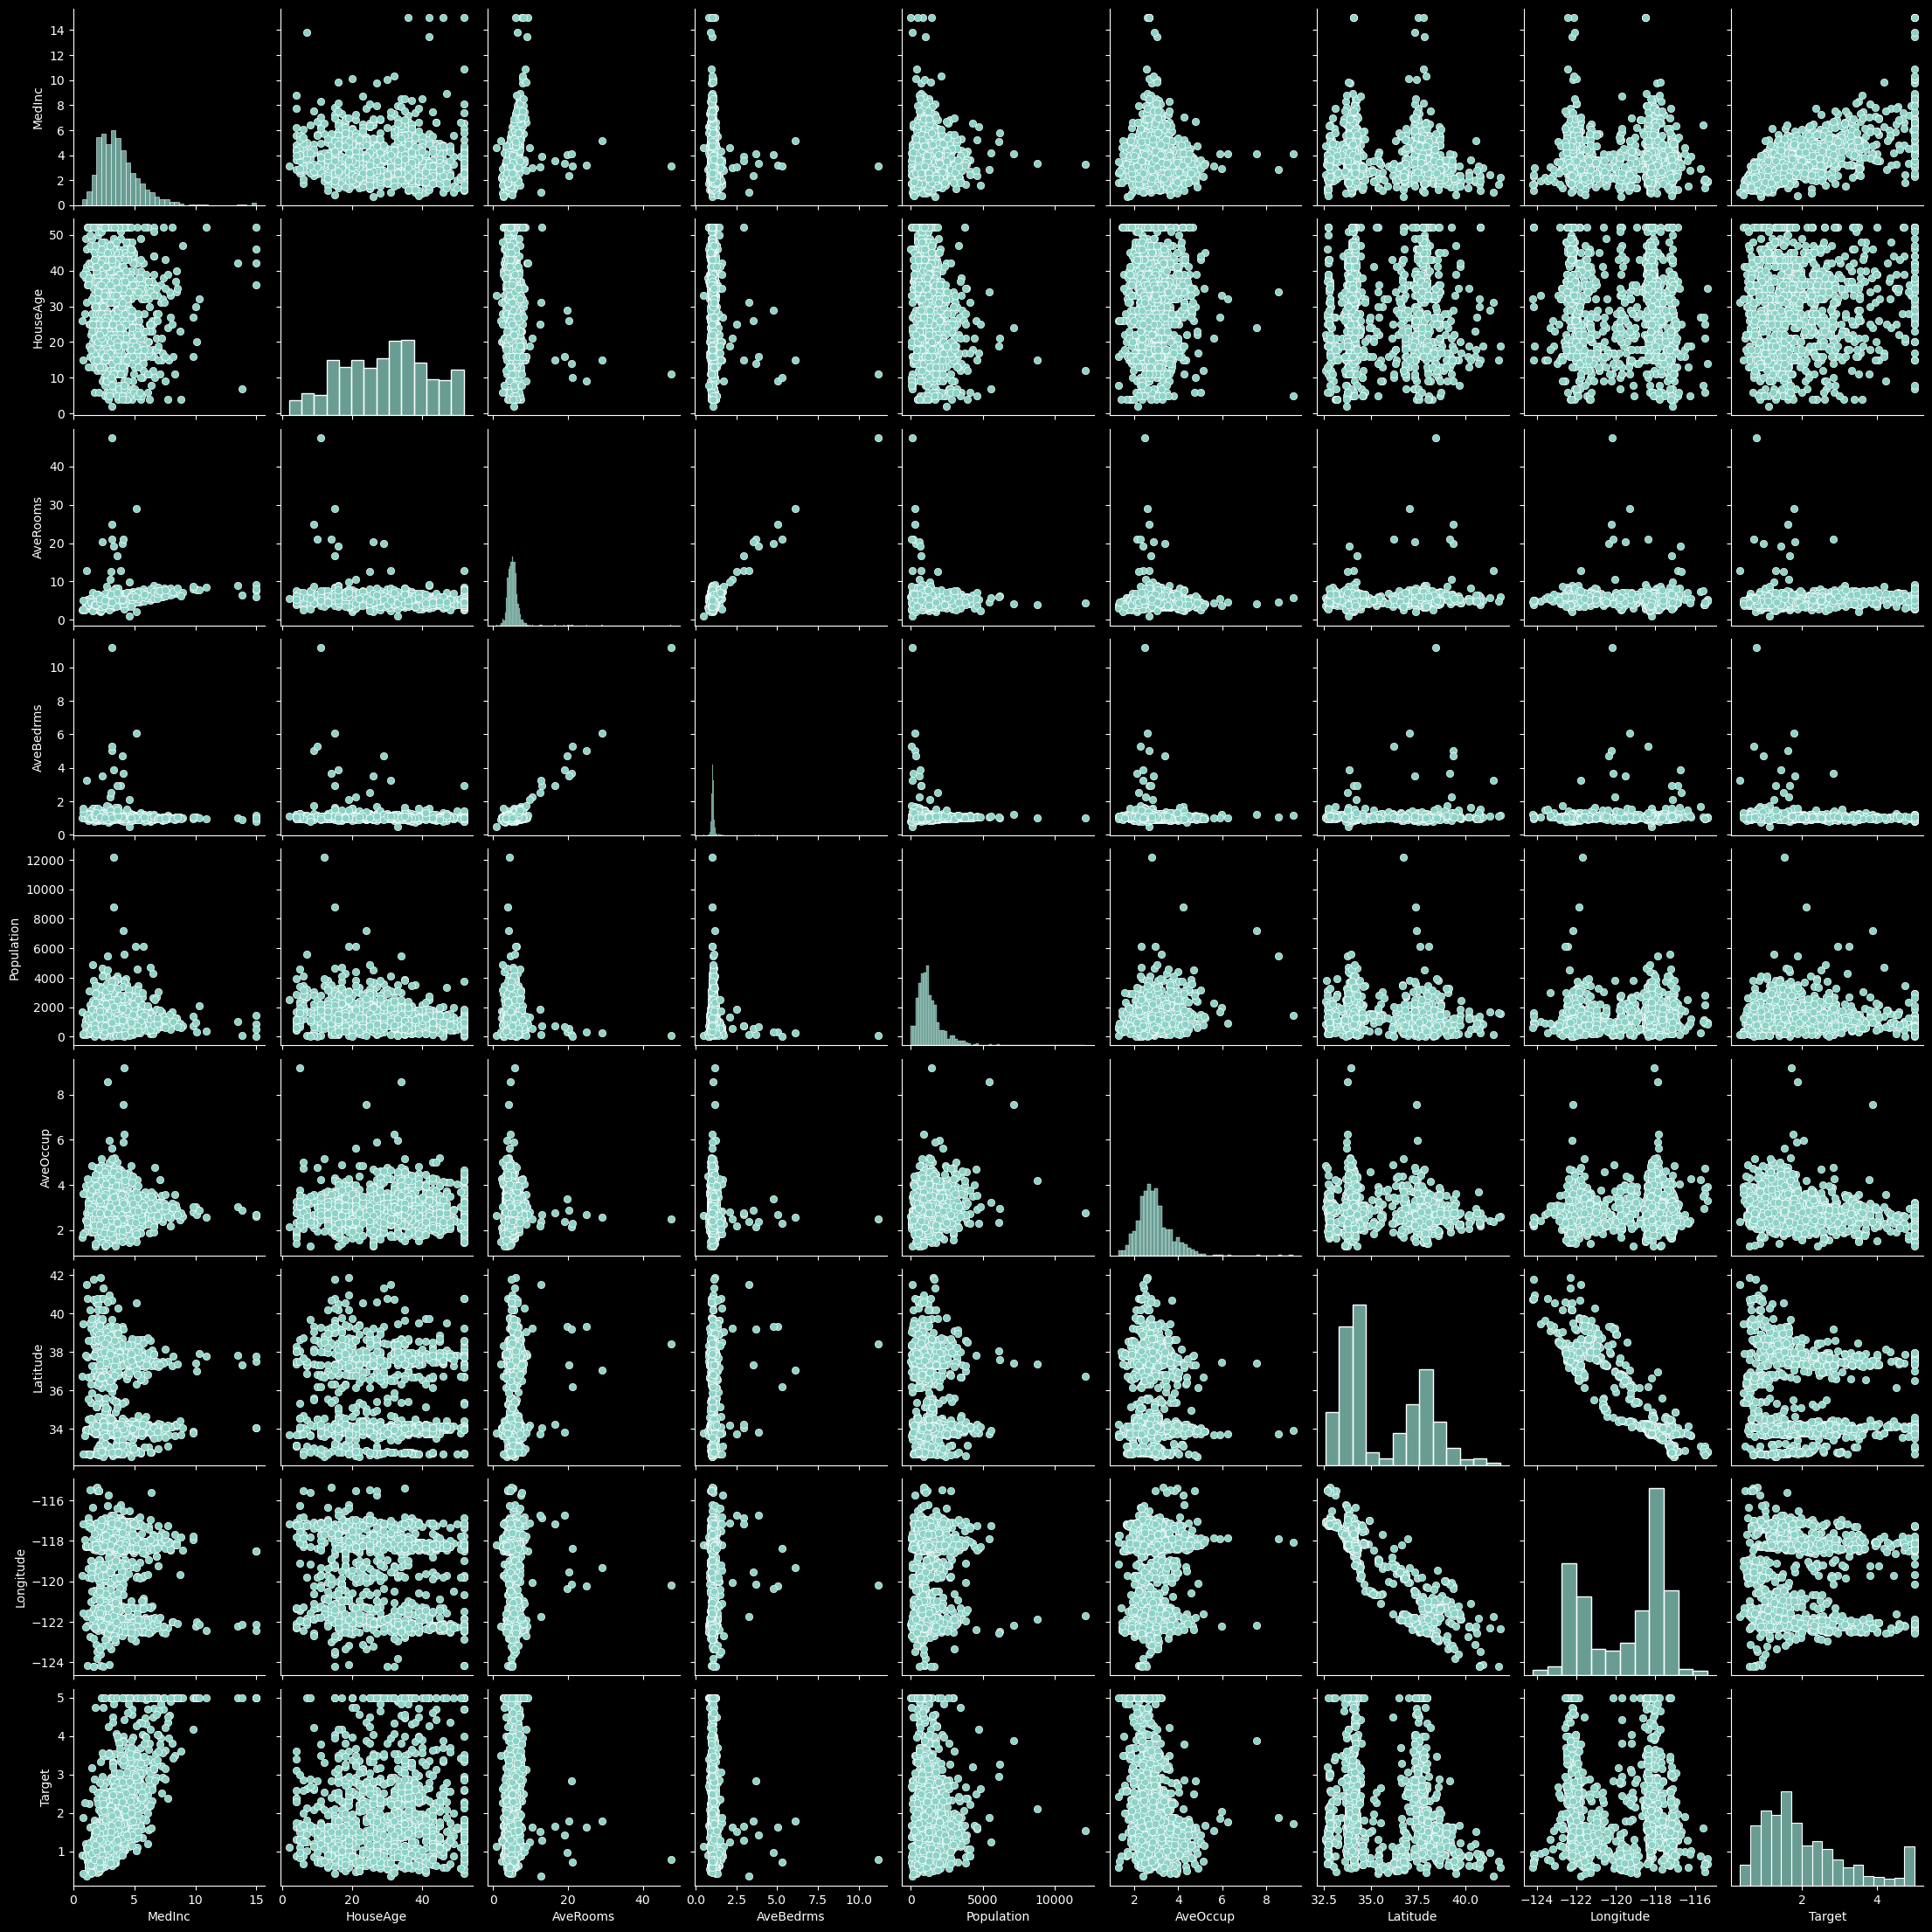

In [11]:
sns.pairplot(df.sample(1000));

Original data shape: (20640, 8), (20640,)
Trn: torch.Size([12384, 8]), torch.Size([12384, 1])
Val: torch.Size([4128, 8]), torch.Size([4128, 1])
Tst: torch.Size([4128, 8]), torch.Size([4128, 1])
Epoch  200: TrnLoss 3.0641e-01 ValLoss 3.3031e-01 MinLoss 3.2982e-01
Epoch  400: TrnLoss 2.9563e-01 ValLoss 3.1816e-01 MinLoss 3.1725e-01
Epoch  600: TrnLoss 2.9252e-01 ValLoss 3.1962e-01 MinLoss 3.1397e-01
Epoch  800: TrnLoss 2.9122e-01 ValLoss 3.1340e-01 MinLoss 3.1108e-01
Epoch 1000: TrnLoss 2.8762e-01 ValLoss 3.1249e-01 MinLoss 3.0933e-01
Epoch 1169: No improvement during last 200 epochs

Epoch  968: TrnLoss 2.8740e-01 ValLoss 3.0933e-01 (min)


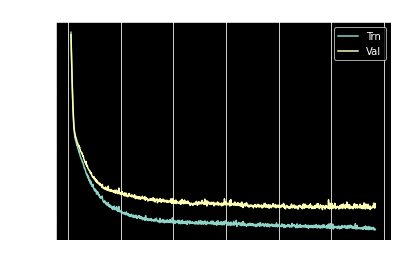

In [5]:
from torch import nn, optim
from data import getCaliforniaHousing, get_dataloader
from model import linear_regressor
from utils import Regressor

Xtrn, Xval, Xtst, ytrn, yval, ytst = getCaliforniaHousing()
model = linear_regressor(Xtrn.size(-1), 1, dim_step=-1)
optimizer = optim.Adam(model.parameters())
criterion = nn.functional.mse_loss

b_size = 256
trnloader = get_dataloader(Xtrn, ytrn, b_size, shuffle=T)
valloader = get_dataloader(Xval, yval, b_size)
tstloader = get_dataloader(Xtst, ytst, b_size)
n_epoch, n_print, early_stop = 3000, 200, 200
plot_from = 10

regressor = Regressor(model, optimizer, criterion)
regressor.run(trnloader, valloader, n_epoch, n_print, early_stop, plot_from);

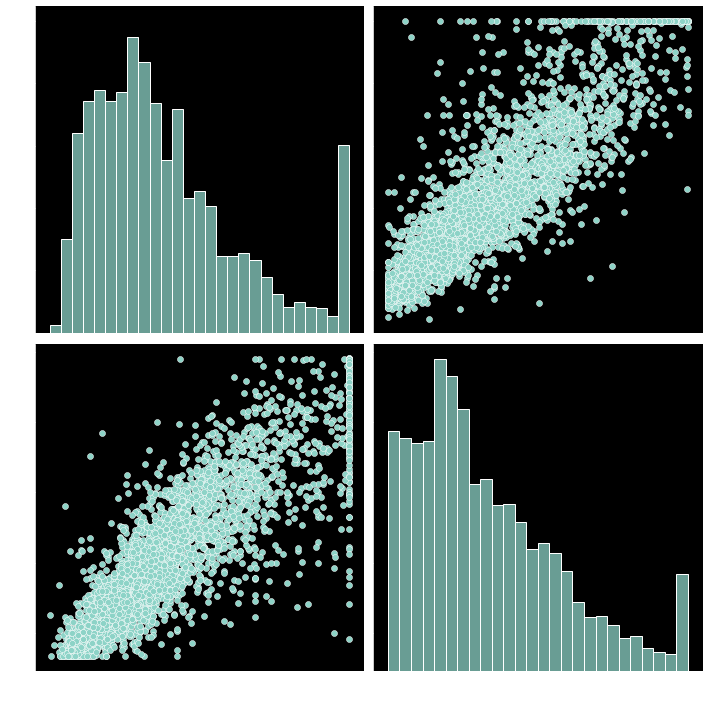

In [6]:
regressor.test(tstloader)

In [21]:
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from torch import nn, optim
from data import get_dataloader, getCaliforniaHousing
from model import linear_regressor

# ds = fetch_california_housing()
# X, y = ds.data, ds.target
# print(X.shape, y.shape)
# Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=.2)
# Xtrn, Xval, ytrn, yval = train_test_split(Xtrn, ytrn, test_size=.25)

# scaler = StandardScaler()
# Xtrn = torch.tensor(scaler.fit_transform(Xtrn)).float()
# Xval = torch.tensor(scaler.transform(Xval)).float()
# Xtst = torch.tensor(scaler.transform(Xtst)).float()
# ytrn = torch.tensor(ytrn).float().unsqueeze(1)
# yval = torch.tensor(yval).float().unsqueeze(1)
# ytst = torch.tensor(ytst).float().unsqueeze(1)

Xtrn, Xval, Xtst, ytrn, yval, ytst = getCaliforniaHousing()

# model = nn.Sequential(nn.Linear(Xtrn.size(-1), 6),  nn.ReLU(),
#                       nn.Linear(6, 5),              nn.ReLU(),
#                       nn.Linear(5, 4),              nn.ReLU(),
#                       nn.Linear(4, 3),              nn.ReLU(),
#                       nn.Linear(3, 1))
model = linear_regressor(Xtrn.size(-1), 1, dim_step=-1)
optimizer = optim.Adam(model.parameters())

b_size = 256
n_epoch, n_print, early_stop = 3000, 200, 200
best_model, best_epoch, minloss = None, np.inf, np.inf
trnloader = get_dataloader(Xtrn, ytrn, b_size, shuffle=T)
valloader = get_dataloader(Xval, yval, b_size, shuffle=F)
tstloader = get_dataloader(Xtst, ytst, b_size, shuffle=F)
trnhistory, valhistory = [], []
for e in range(n_epoch):
    trnloss, valloss = 0, 0
    for Xi, yi in trnloader:
        yhati = model(Xi)
        loss = nn.functional.mse_loss(yhati, yi)
        optimizer.zero_grad();  loss.backward();    optimizer.step()
        trnloss += float(loss)
    trnloss /= len(trnloader)

    with torch.no_grad():
        for Xi, yi in valloader:
            yhati = model(Xi)
            loss = nn.functional.mse_loss(yhati, yi)
            valloss += loss
        valloss /= len(valloader)

    trnhistory.append(trnloss)
    valhistory.append(valloss)
    if (e + 1) % n_print == 0:  
        print(f'Epoch {e+1:6d}: TrnLoss {trnloss:.4e} '
              f'ValLoss {valloss:.4e} MinLoss {minloss:.4e}')
    if valloss < minloss:
        minloss = valloss
        best_epoch = e
        best_model = copy.deepcopy(model.state_dict())
    else:
        if early_stop and e - best_epoch > early_stop:
            print(f'Epoch {e+1:6d}: No improvement during last {early_stop} epochs')
            break
print(f'Min ValLoss from epoch {best_epoch+1}')
model.load_state_dict(best_model)

Original data shape: (20640, 8), (20640,)
Trn: torch.Size([12384, 8]), torch.Size([12384, 1])
Val: torch.Size([4128, 8]), torch.Size([4128, 1])
Tst: torch.Size([4128, 8]), torch.Size([4128, 1])
Epoch    200: TrnLoss 3.4057e-01 ValLoss 3.4202e-01 MinLoss 3.4135e-01
Epoch    400: TrnLoss 3.2361e-01 ValLoss 3.3412e-01 MinLoss 3.3150e-01
Epoch    600: TrnLoss 2.9928e-01 ValLoss 3.0912e-01 MinLoss 3.0885e-01
Epoch    800: TrnLoss 2.9014e-01 ValLoss 3.0187e-01 MinLoss 3.0027e-01
Epoch   1000: TrnLoss 2.8621e-01 ValLoss 2.9796e-01 MinLoss 2.9747e-01
Epoch   1200: TrnLoss 2.8450e-01 ValLoss 2.9986e-01 MinLoss 2.9460e-01
Epoch   1400: TrnLoss 2.8521e-01 ValLoss 2.9384e-01 MinLoss 2.9190e-01
Epoch   1600: TrnLoss 2.8109e-01 ValLoss 2.9573e-01 MinLoss 2.9109e-01
Epoch   1800: TrnLoss 2.8032e-01 ValLoss 2.9197e-01 MinLoss 2.8869e-01
Epoch   1855: No improvement during last 200 epochs
Min ValLoss from epoch 1654


<All keys matched successfully>

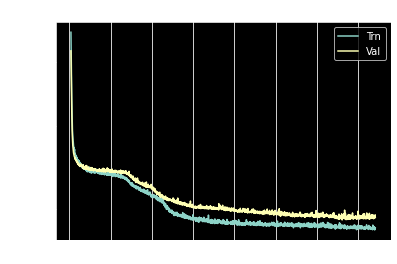

In [22]:
plot_from = 10

plt.plot(range(plot_from, len(trnhistory)), trnhistory[plot_from:], label='Trn')
plt.plot(range(plot_from, len(valhistory)), valhistory[plot_from:], label='Val')
plt.title('Train & Valid Loss History')
plt.grid(T)
plt.yscale('log')
plt.legend();

TrnLoss 2.8371e-01, ValLoss 2.8869e-01, TstLoss 3.3036e-01


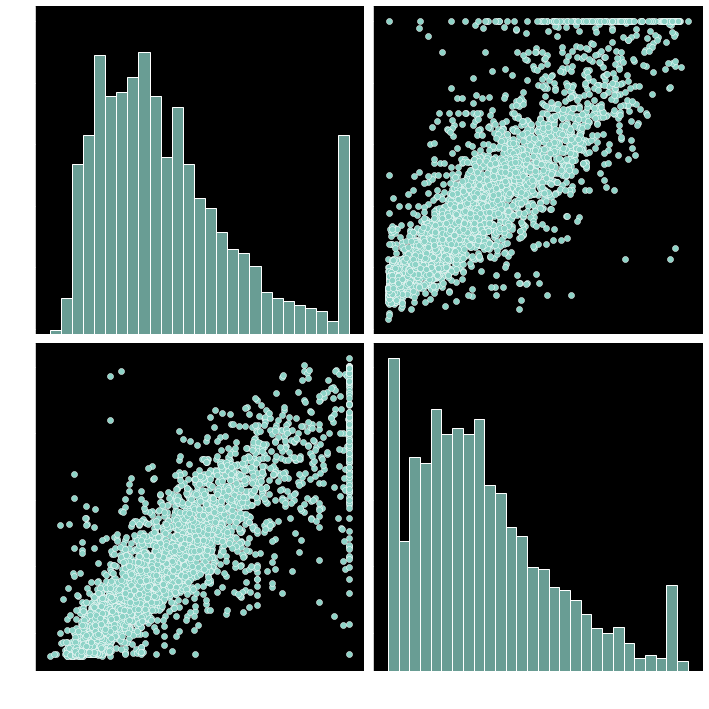

In [23]:
tstloss, yhat, y = 0, [], []
with torch.no_grad():
    for Xi, yi in tstloader:
        yhati = model(Xi)
        loss = nn.functional.mse_loss(yhati, yi)
        tstloss += loss
        yhat.append(yhati)
        y.append(yi)
tstloss /= len(tstloader)
yhat = torch.cat(yhat)
y = torch.cat(y)

sorted_history = sorted(zip(trnhistory, valhistory), key=lambda x: x[1])
print(f'TrnLoss {sorted_history[0][0]:.4e}, ValLoss {sorted_history[0][1]:.4e}, '
      f'TstLoss {tstloss:.4e}')

df = pd.DataFrame(
    torch.cat([y, yhat], dim=-1).numpy(), columns='y yhat'.split())
sns.pairplot(df, height=5);

# MNIST

/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <AD0702F8-F0F4-3872-8C19-A834018634B4> /opt/homebrew/Caskroom/miniconda/base/envs/py311/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


           X.shape              X[0].max()         y.shape           y.max()    
trn torch.Size([60000, 28, 28]) tensor(1.) torch.Size([60000, 1]) tensor(9)
tst torch.Size([10000, 28, 28]) tensor(1.) torch.Size([10000, 1]) tensor(9)


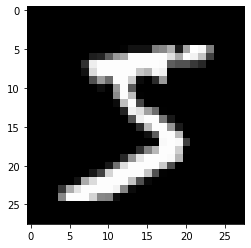

In [2]:
from data import plot, getMNIST

Xtrn, ytrn, Xtst, ytst = getMNIST()
plot(Xtrn[0])

In [4]:
from torch import nn, optim
from data import get_loaders
from model import conv_classifier
from utils import Classifier

trnloader, valloader, tstloader = get_loaders(Xtrn.unsqueeze(1), ytrn, Xtst.unsqueeze(1), ytst)
in_shape = (1,) + tuple(Xtrn.shape[1:])
n_class = 10
model = conv_classifier(in_shape, n_class)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
clf = Classifier(model, optimizer, criterion)
clf.run(trnloader, valloader, 100, 50)

  0%|          | 0/100 [00:36<?, ?it/s]


KeyboardInterrupt: 